**TIL:** In 1971 John List murdered his family to save their souls and arranged their bodies on sleeping bags. He then cleaned up, cut himself out of the family's photos, turned on a religious radio station, and fled. Only after the lights in the house had burned out one by one did neighbors call police. He moved to a new state, started a new life and luded capture for 18 years after. He was finally compromised after an airing of America’s Most Wanted featured an age-progressed bust of his head, which bore such a resemblance that one of List’s neighbors turned him in.

Part two of this assignment was originally intended for the final assignment, which stemmed from my interests in the mass production of sentiments, the vernacular of signages and greeting cards and thank-you plastic bags. I was experimenting with how I can use the content of this letter and turn them into greeting cards.

In [1]:
import sys
!{sys.executable} -m pip install --upgrade https://github.com/aparrish/bezmerizing/archive/master.zip

  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip
  Created wheel for bezmerizing: filename=bezmerizing-0.1.1-py3-none-any.whl size=17284 sha256=86f95ffbd2e4d8c019f6ed3a0a7b5d685e1ff65d56635bf2174912e75a52963f
  Stored in directory: /private/var/folders/r7/_zcjr_6563j5s2220pvq52cw0000gn/T/pip-ephem-wheel-cache-lexbikti/wheels/74/5a/7d/4a62c2490b6c6061916e41ae070caaed12664893aef1a56d7c
Successfully built bezmerizing
  Attempting uninstall: bezmerizing
    Found existing installation: bezmerizing 0.1.1
    Uninstalling bezmerizing-0.1.1:
      Successfully uninstalled bezmerizing-0.1.1


Whew! With all of that in mind, we can start programming. Before we begin, some preliminary imports from Flat and Bezmerizing:

In [2]:
from flat import document, rgb, rgba, font, strike, shape
from flat.command import moveto, quadto, curveto, lineto, closepath
from bezmerizing import Polyline, Path
import numpy as np
from copy import copy

And some functions from `numpy` which we'll use for generating random numbers.

In [3]:
from numpy.random import uniform, normal, choice

Plus our trusty function for displaying Flat drawings inline:

In [4]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [6]:
doodad = Path(my_cmds)

Evaluating the path object shows its contents:

In [7]:
doodad

Path([moveto(x=50.0000, y=33.0000), lineto(x=67.0000, y=67.0000), curveto(x1=60.0000, y1=50.0000, x2=40.0000, y2=50.0000, x=33.0000, y=67.0000), closepath])

In [10]:
doodad_center = Path([moveto(x=0, y=-17),
                      lineto(x=17, y=17),
                      curveto(x1=10, y1=0, x2=-10, y2=0, x=-17, y=17),
                      closepath])

In [13]:
doodad_and_friend = Path([
    moveto(x=0, y=-17),
    lineto(x=17, y=17),
    curveto(x1=10, y1=0, x2=-10, y2=0, x=-17, y=17),
    closepath,
    moveto(x=0, y=20),
    lineto(x=7, y=28),
    lineto(x=-7, y=28),
    closepath
])

In [15]:
doodad_overlap = Path([
    moveto(x=0, y=-17),
    lineto(x=17, y=17),
    curveto(x1=10, y1=0, x2=-10, y2=0, x=-17, y=17),
    closepath,
    moveto(x=0, y=-8),
    lineto(x=7, y=0),
    lineto(x=-7, y=0),
    closepath
])

In [17]:
doodad_ccw = Path([
    moveto(x=0, y=-17),
    lineto(x=17, y=17),
    curveto(x1=10, y1=0, x2=-10, y2=0, x=-17, y=17),
    closepath,
    moveto(x=0, y=-8),
    lineto(x=-7, y=0),
    lineto(x=7, y=0),
    closepath
])

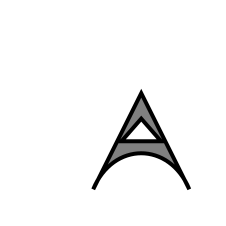

In [18]:
page = document(80, 80, 'mm').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
page.place(pen.path(doodad_ccw.translate(50, 50)))
show(page) # show the page

In [19]:
doodad_polyline = doodad.to_polyline_list(samples_per=6, resample_polylines=True)[0]

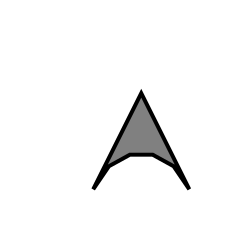

In [20]:
page = document(80, 80, 'mm').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
page.place(pen.polygon(doodad_polyline))
show(page) # show the page

This method works by sampling individual points from curves and lines at regular intervals. It looks chunky, but you can ameliorate that by increasing the `samples_per` parameter:

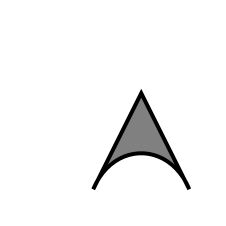

In [21]:
doodad_pl_hires = doodad.to_polyline_list(samples_per=24, resample_polylines=True)[0]
page = document(80, 80, 'mm').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
page.place(pen.polygon(doodad_pl_hires))
show(page) # show the page

A `PolylineList` object also has a `.to_path()` method, which returns the contours in the `PolylineList` as a `Path` object. This is important, since it allows you to retain cutout contours when you actually draw the resulting path:

In [22]:
doodad_ccw_pl = doodad_ccw.to_polyline_list(samples_per=6, resample_polylines=True)

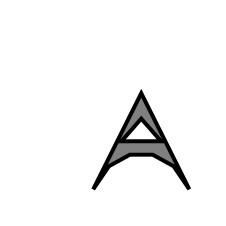

In [23]:
doodad_pl_hires = doodad.to_polyline_list(samples_per=24, resample_polylines=True)[0]
page = document(80, 80, 'mm').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
page.place(pen.path(doodad_ccw_pl.to_path().translate(50, 50)))
show(page) # show the page

A common workflow in this notebook is to convert a `Path` to a `PolylineList`, perform some operations on the vertices of `Polylines` in that list, and the convert back to a path.

## Drawing strings with flat

Flat has a handful of helpful functions for drawing strings to the screen with a given font. You need to download the font file for the font you want to use, put it in the same directory as this notebook, and then call `font.open` as below. We'll use a font from Google's [Noto collection](https://www.google.com/get/noto/).

In [24]:
f = font.open("./aphrodite-text.otf")

The `strike()` call is like `shape()` but for text; `.size()`'s parameters set the font size and leading, respectively; `.frame()` on the placement reflows the text in an invisible rectangle with the given coordinates and size. Once you've created a strike, you can place the text on the page using the `.text()` method, like so:

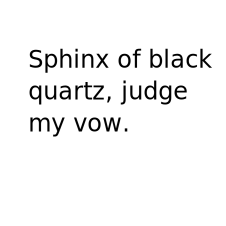

In [25]:
d = document(80, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
text_pen = strike(f).color(rgba(0, 0, 0, 255)).size(24, 32)
page.place(text_pen.text("Sphinx of black quartz, judge my vow.")).frame(10, 10, 60, 60)
show(page)

Flat has a fairly sophisticated system for text layout that is [worth looking into](https://xxyxyz.org/flat#tutorial). But in this tutorial, we're more interested at getting at the actual geometry data in the fonts themselves.

## Glyph paths

Fortunately, Flat lets us access the geometry of glyphs in the font directly. Each glyph has an index, and calling the font's `.glyph()` method returns a list of Flat path commands for that glyph, like so:

In [26]:
f.glyph(38)

For the rest of the notebook, I'm going to create Bezmerizing `Path` objects from these lists, which make the data a bit easier to work with:

In [27]:
glyph_path = Path(f.glyph(38))
glyph_path

Path([moveto(x=2147.0000, y=579.0000), curveto(x1=2157.0000, y1=570.0000, x2=2161.0000, y2=555.0000, x=2151.0000, y=546.0000), curveto(x1=2140.0000, y1=536.0000, x2=2124.0000, y2=542.0000, x=2119.0000, y=554.0000), curveto(x1=2110.0000, y1=577.0000, x2=2108.0000, y2=592.0000, x=2018.0000, y=590.0000), curveto(x1=1643.0000, y1=582.0000, x2=1379.0000, y2=18.0000, x=1306.0000, y=-157.0000), curveto(x1=1274.0000, y1=-227.0000, x2=1245.0000, y2=-337.0000, x=1199.0000, y=-415.0000), curveto(x1=1350.0000, y1=-459.0000, x2=1525.0000, y2=-575.0000, x=1583.0000, y=-772.0000), curveto(x1=1626.0000, y1=-957.0000, x2=1541.0000, y2=-1177.0000, x=1115.0000, y=-1179.0000), curveto(x1=743.0000, y1=-1180.0000, x2=437.0000, y2=-987.0000, x=321.0000, y=-759.0000), curveto(x1=288.0000, y1=-693.0000, x2=270.0000, y2=-627.0000, x=266.0000, y=-567.0000), curveto(x1=153.0000, y1=-502.0000, x2=70.0000, y2=-386.0000, x=76.0000, y=-245.0000), curveto(x1=83.0000, y1=-73.0000, x2=230.0000, y2=26.0000, x=347.0000, y

Looking at the path data reveals a couple of interesting things. The first is that the path consists mainly of `lineto` and `quadto` commands. A `lineto` command moves the cursor from the current position to the specified position, drawing a line along the way; a `quadto` command draws a quadratic Bézier curve to the specified `x` and `y` point, with a control point at the coordinates specified by `x1` and `y1`. You'll also notice that y-coordinates are mostly negative. That's because glyphs in fonts are generally drawn with the origin of the coordinate system (`0, 0`) in the *lower left-hand* corner.

> A quadratic Bézier curve has one control point; a cubic Bézier has two control points. TrueType fonts (TTFs) use quadratic Bézier curves exclusively; OpenType fonts (generally) use cubic Bézier curves.

The coordinates of points in TrueType and OpenType fonts are always specified as integers. The value of these integers doesn't correspond with any real-world unit; instead, each font must specify a "density" parameter that indicates how many units in the font's coordinate system correspond with an em-width. In Flat, you can access this with the `.density` attribute of the font object:

In [28]:
f.density

1000

This means that there are 1000 "font space" units per em. Broadly speaking, this means that in order to draw this font at 72 point size, you'd need to scale the glyph by 24 / 1000 (0.024):

In [29]:
glyph_path.scale(72 / f.density)

Path([moveto(x=154.5840, y=41.6880), curveto(x1=155.3040, y1=41.0400, x2=155.5920, y2=39.9600, x=154.8720, y=39.3120), curveto(x1=154.0800, y1=38.5920, x2=152.9280, y2=39.0240, x=152.5680, y=39.8880), curveto(x1=151.9200, y1=41.5440, x2=151.7760, y2=42.6240, x=145.2960, y=42.4800), curveto(x1=118.2960, y1=41.9040, x2=99.2880, y2=1.2960, x=94.0320, y=-11.3040), curveto(x1=91.7280, y1=-16.3440, x2=89.6400, y2=-24.2640, x=86.3280, y=-29.8800), curveto(x1=97.2000, y1=-33.0480, x2=109.8000, y2=-41.4000, x=113.9760, y=-55.5840), curveto(x1=117.0720, y1=-68.9040, x2=110.9520, y2=-84.7440, x=80.2800, y=-84.8880), curveto(x1=53.4960, y1=-84.9600, x2=31.4640, y2=-71.0640, x=23.1120, y=-54.6480), curveto(x1=20.7360, y1=-49.8960, x2=19.4400, y2=-45.1440, x=19.1520, y=-40.8240), curveto(x1=11.0160, y1=-36.1440, x2=5.0400, y2=-27.7920, x=5.4720, y=-17.6400), curveto(x1=5.9760, y1=-5.2560, x2=16.5600, y2=1.8720, x=24.9840, y=3.6000), curveto(x1=36.5040, y1=5.8320, x2=55.3680, y2=5.9760, x=67.3200, y=

Note that this *doesn't* mean that drawing the glyph with Flat will result in a glyph that is exactly 72 points tall! You have to take into account the units of the Flat canvas as well. If your Flat canvas is in millimeters, you'd convert these units to millimeters first (1pt = ~0.385mm):

In [30]:
glyph_path.scale(72 / f.density * 0.385)

Path([moveto(x=59.5148, y=16.0499), curveto(x1=59.7920, y1=15.8004, x2=59.9029, y2=15.3846, x=59.6257, y=15.1351), curveto(x1=59.3208, y1=14.8579, x2=58.8773, y2=15.0242, x=58.7387, y=15.3569), curveto(x1=58.4892, y1=15.9944, x2=58.4338, y2=16.4102, x=55.9390, y=16.3548), curveto(x1=45.5440, y1=16.1330, x2=38.2259, y2=0.4990, x=36.2023, y=-4.3520), curveto(x1=35.3153, y1=-6.2924, x2=34.5114, y2=-9.3416, x=33.2363, y=-11.5038), curveto(x1=37.4220, y1=-12.7235, x2=42.2730, y2=-15.9390, x=43.8808, y=-21.3998), curveto(x1=45.0727, y1=-26.5280, x2=42.7165, y2=-32.6264, x=30.9078, y=-32.6819), curveto(x1=20.5960, y1=-32.7096, x2=12.1136, y2=-27.3596, x=8.8981, y=-21.0395), curveto(x1=7.9834, y1=-19.2100, x2=7.4844, y2=-17.3804, x=7.3735, y=-15.7172), curveto(x1=4.2412, y1=-13.9154, x2=1.9404, y2=-10.6999, x=2.1067, y=-6.7914), curveto(x1=2.3008, y1=-2.0236, x2=6.3756, y2=0.7207, x=9.6188, y=1.3860), curveto(x1=14.0540, y1=2.2453, x2=21.3167, y2=2.3008, x=25.9182, y=-10.9217), curveto(x1=30.7

With all of this in mind, we can actually draw the glyph to the screen:

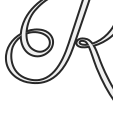

In [31]:
glyph_path = Path(f.glyph(38)).translate(0, f.density).scale(72 / f.density * 0.385)
page = document(40, 40, 'mm').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240)).width(2)
page.place(pen.path(glyph_path))
show(page)

(I translated the figure "down" by the font density to make sure that we get the whole thing on the canvas.) Try replacing `38` with some other number!

Things get a little bit easier if we use points as the measurement unit for the Flat canvas. That way, we don't have to always include the conversion from points to millimeters. A point is 1/72nd of an inch, so a canvas 144pts wide should be about two inches. (Your browser should show this as about two inches on your actual screen!)

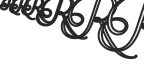

In [32]:
glyph_path = Path(f.glyph(38)).translate(0, f.density)
page = document(144, 72, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240)).width(2)
current_x = 0
for size in [9, 12, 14, 24, 36, 48, 72]:
    page.place(pen.path(glyph_path.scale(size/f.density).translate(current_x, 0)))
    current_x += size
show(page)

### The character map and advances

Glyph indices (i.e., the number you pass to the `.glyph()` method) are arbitrary, presumably assigned by the type designer when creating the font, or something? As mentioned above, figuring out which glyphs to use to represent a given string of characters is not a straightforward task. But for the trivial case of looking up the glyph for a single character, there's a shortcut: the `.charmap` attribute of the font object, which maps Unicode codepoints to glyph indices.

For example, to get the glyph for the letter `a`, first find its Unicode codepoint:

In [33]:
ord("a")

97

... and then look it up in the font's `charmap`:

In [34]:
f.charmap[ord("a")]

54

... then pass that value to the `.glyph()` method. Putting it all together in one expression:

In [35]:
f.glyph(f.charmap[ord("a")])

So, to draw a lower-case `a`:

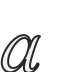

In [36]:
a_glyph = Path(f.glyph(f.charmap[ord("a")]))
a_glyph = a_glyph.translate(0, f.density).scale(72 / f.density)
page = document(72, 72, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240)).width(2)
page.place(pen.path(a_glyph))
show(page)

The font also stores "advances" for each character, i.e., how much the pen should move horizontally after drawing the character. Advances can be positive or negative (e.g., for a glyph that represents a diacritic). In TrueType and OpenType, there are both horizontal and vertical advances, but Flat only makes the horizontal advances available. Access the advances with the font object's `.advances` attribute, which is a dictionary mapping glyph IDs to their advance widths. For example:

In [37]:
f.advances[f.charmap[ord("a")]]

550

These two helper functions get the path commands for a given character and the advance for a given character:

In [38]:
def glyphcommands(f, ch):
    return Path([copy(cmd) for cmd in f.glyph(f.charmap[ord(ch)])])
def advancefor(f, ch):
    return f.advances[f.charmap[ord(ch)]]

The path for the letter `z`:

In [39]:
glyphcommands(f, "z")

Path([moveto(x=248.0000, y=-514.0000), curveto(x1=183.0000, y1=-514.0000, x2=146.0000, y2=-450.0000, x=128.0000, y=-423.0000), curveto(x1=113.0000, y1=-400.0000, x2=92.0000, y2=-373.0000, x=92.0000, y=-362.0000), curveto(x1=92.0000, y1=-357.0000, x2=94.0000, y2=-355.0000, x=100.0000, y=-355.0000), curveto(x1=108.0000, y1=-355.0000, x2=116.0000, y2=-360.0000, x=120.0000, y=-368.0000), curveto(x1=150.0000, y1=-413.0000, x2=200.0000, y2=-427.0000, x=248.0000, y=-427.0000), curveto(x1=313.0000, y1=-427.0000, x2=377.0000, y2=-403.0000, x=394.0000, y=-400.0000), curveto(x1=390.0000, y1=-386.0000, x2=20.0000, y2=-61.0000, x=20.0000, y=-61.0000), curveto(x1=20.0000, y1=-61.0000, x2=-29.0000, y2=-23.0000, x=-29.0000, y=0.0000), curveto(x1=-29.0000, y1=14.0000, x2=-9.0000, y2=19.0000, x=1.0000, y=19.0000), curveto(x1=29.0000, y1=19.0000, x2=54.0000, y2=-8.0000, x=54.0000, y=-8.0000), curveto(x1=94.0000, y1=-51.0000, x2=126.0000, y2=-68.0000, x=153.0000, y=-68.0000), curveto(x1=236.0000, y1=-68.0

... and its advance:

In [40]:
advancefor(f, "z")

475

### Application: Glyph complexity analysis

One potential small application of this data is the ability to analyze the font's glyphs. We can get a full list of all of the glyph indices with the `.values()` attribute of `.charmap`:

In [41]:
all_indices = list(f.charmap.values())

(Note that glyph indices are not guaranteed to be contiguous or consecutive.) That gives us the total number of glyphs in the font (or, at least, glyphs that are associated with individual Unicode characters):

In [42]:
len(all_indices)

319

Let's quickly find out which character in the font is the most complex—i.e., which glyph has the largest number of commands in its path. To do this, we'll make a list that has a tuple with the glyph index and the length of the glyph's path (obtained with the font's `.glyph()` method):

In [43]:
glyph_path_lengths = [(idx, len(f.glyph(idx))) for idx in all_indices]

The resulting data structure looks like this:

In [44]:
glyph_path_lengths[:12]

[(3, 0),
 (67, 19),
 (239, 20),
 (109, 48),
 (110, 38),
 (111, 36),
 (66, 32),
 (118, 10),
 (61, 10),
 (62, 10),
 (112, 26),
 (87, 13)]

... which tells us that the glyph at index 4 has 16 elements in its path; the glyph at index 7 has 43 elements, etc. The following code sorts this list in reverse order by the value in the second element of the tuple, grabbing just the top ten:

In [45]:
glyphs_by_complexity = sorted(glyph_path_lengths, key=lambda x: x[1], reverse=True)[:10]
glyphs_by_complexity

[(331, 237),
 (328, 237),
 (330, 237),
 (329, 237),
 (294, 125),
 (93, 111),
 (94, 80),
 (261, 68),
 (209, 68),
 (210, 68)]

To get the index of just the most complex character:

In [46]:
most_complex_index = glyphs_by_complexity[0][0]

Let's draw it to see what this glyph looks like!

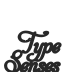

In [47]:
glyph = Path(f.glyph(most_complex_index))
glyph = glyph.translate(0, f.density).scale(72 / f.density)
page = document(72, 72, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240)).width(2)
page.place(pen.path(glyph))
show(page)

Whoa! What is that wonderful thing? In order to find out, we need some way to track the glyph index back to the Unicode character it represents. An easy way to do this is to "flipping" the `.charmap` dictionary, creating a new dictionary with the values as keys and the keys as values. This gives us a rough reverse-lookup, which we'll use to identify the Unicode character associated with the glyph:

In [48]:
unicode_lookup = {v: k for k, v in f.charmap.items()}

(This is a [dictionary comprehension](https://www.python.org/dev/peps/pep-0274/), which works like a list comprehension but has a key/value pair as the predicate expression, and evaluates to a dictionary with the resulting key/value pairs.)

For example, the glyph at index 42 has the following Unicode code point:

In [49]:
unicode_lookup[42]

87

Using Python's `unicodedata` module, we can get the name for this character:

In [50]:
import unicodedata

In [51]:
unicodedata.name(chr(unicode_lookup[42]))

'LATIN CAPITAL LETTER W'

So what's our mystery glyph?

In [52]:
unicodedata.name(chr(unicode_lookup[most_complex_index]))

'CURRENCY SIGN'

It's the [multiocular O](https://en.wikipedia.org/wiki/Multiocular_O) (ꙮ), a variant of the Cyrillic letter O found in a handful of medieval manuscripts and also probably the coolest codepoint in Unicode.

### Visualizing glyph complexity

Let's build on this a little bit to make some asemic writing. Or maybe this is more like a text visualization experiment? I'm not sure! I'm going to write some code that "rewrites" a text by replacing each character with a rectangle whose fill color corresponds to the complexity of that character's corresponding glyph, and whose width corresponds to the advance of the character.

We'll use Robert Frost's "The Road Not Taken," [included in this repository as frost.txt](frost.txt).

The code below does a couple of tricky things. Some of those tricky things are layout-related, which we'll cover in more detail in the following section.

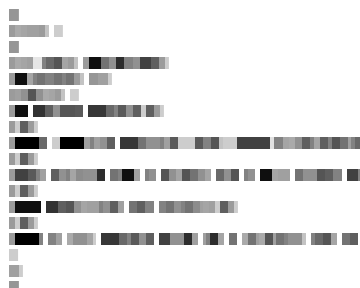

In [53]:
width = 360 # 5in
height = 288 # 4in
border = 9 # 1/8in
lineheight = 16 # size of each line
rectsize = 12 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
for line in open("frost.txt"):
    line = line.strip() # remove trailing whitespace
    for ch in line:
        path_len = len(glyphcommands(f, ch).commands)
        val = 255 - (path_len * 5)
        advance = advancefor(f, ch) / f.density * lineheight
        brush = shape().nostroke().fill(rgb(val, val, val))
        page.place(brush.rectangle(xoff, yoff, advance, rectsize))
        xoff += int(advance)
    xoff = border
    yoff += lineheight
show(page)

### Rendering a string "by hand"

Using `glyphcommands()` and `advancefor()`, you can draw an entire string on the screen. The most simple technique to render a string of characters in a Roman-derived alphabet (like English):

* Keep track of the current cursor position.
* For each character in the string:
  * Draw the glyph associated with this character at the current cursor position.
  * Move the current cursor position to the right by the amount of the character's advance.

It should be noted that there are many important drawbacks to this approach:

* It only works with left-to-right writing
* Doesn't take into account kerning, ligatures, etc.

Even with simple left-to-right alphabets, there's more to think about than what we've implemented here. For example, this approach doesn't handle things like text alignment, line breaks, margins, indentation, etc. Still, this is a good starting point.

> The task of taking a sequence of characters and turning it into a sequence of glyphs is called "text shaping," and it's a very complicated process, moreso for scripts like Arabic that rely heavily on ligatures. [HarfBuzz](https://en.wikipedia.org/wiki/HarfBuzz) is a well-known open source library for doing text shaping, and it has [Python bindings](https://github.com/harfbuzz/uharfbuzz).

#### One character at a time

The code below implements this simple string layout procedure. It moves the pen by the character's advance on the x axis and draws the next character at the new position, using `translate()` to translate the path commands to the appropriate place.

In [123]:
s = "P.S. Mother is in the hallway in the attic - 3d floor. She was too heavy to move."

In [646]:
page = document(700, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = glyphcommands(f, ch).scale(factor).translate(cx, 60)
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
    str.split(str="", num=string.count(str)).
show(page)

SyntaxError: invalid syntax (<ipython-input-646-93daab2e23e4>, line 9)

Because we're drawing one character at a time, we can introduce some random variation to the character positions and scale:

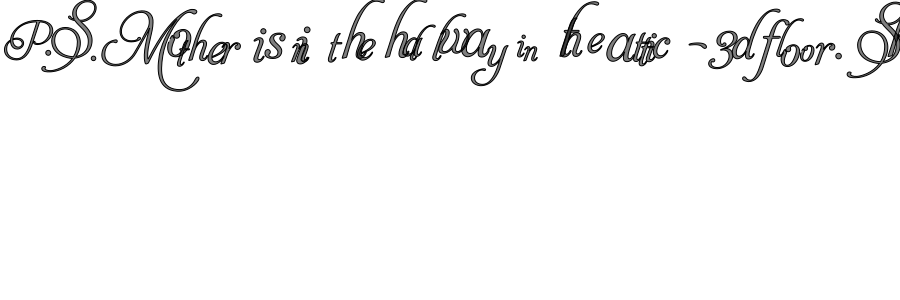

In [379]:
page = document(900, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.75, 1.5))
                  .translate(cx + normal(0, 4), 60 + normal(0, 4)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

We don't have to draw the characters on the screen in a straight line either:

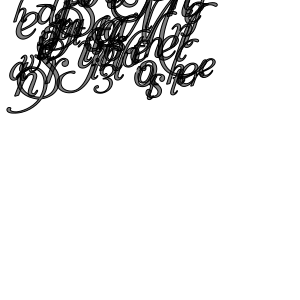

In [376]:
page = document(300, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.75, 1.5))
                  .translate(factor + uniform(200), factor + uniform(100)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

#### Making one big path

Another approach is to build one larger `Path` object that combines the paths of each of the individual letters, and draw that instead. This has some interesting advantages that we'll look at later on. The following cell defines a function `combine_path()` that takes a font and a string and returns a path that combines the paths for each character in the string:

In [58]:
from itertools import chain
def combine_path(f, s):
    text_paths = []
    cx = 0
    for ch in s:
        glyph_path = glyphcommands(f, ch).translate(cx, 0)
        text_paths.append(glyph_path)
        cx += advancefor(f, ch)
    combined = Path(list(chain(*text_paths)))
    return combined

Call it like this:

In [560]:
qf_path = combine_path(f, "'I Know That What Has Been Done Is Wrong'")

The resulting path has a lot of commands:

In [553]:
len(qf_path.commands)

990

But you can draw it like any other path:

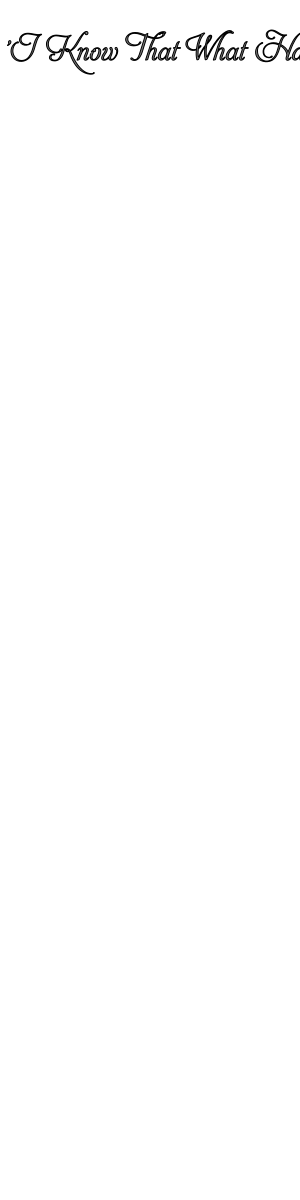

In [558]:
page = document(300, 1200, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 24 / f.density
page.place(pen.path(qf_path.scale(factor).translate(0, 60)))
show(page)

### Modifying paths

Of course, nothing is forcing us to render these glyph paths exactly as they're stored in the font! We can modify them and reinterpret them. Let's take a character like `z`:

In [62]:
z_path_orig = glyphcommands(f, "z")

In [63]:
z_path_orig

Path([moveto(x=248.0000, y=-514.0000), curveto(x1=183.0000, y1=-514.0000, x2=146.0000, y2=-450.0000, x=128.0000, y=-423.0000), curveto(x1=113.0000, y1=-400.0000, x2=92.0000, y2=-373.0000, x=92.0000, y=-362.0000), curveto(x1=92.0000, y1=-357.0000, x2=94.0000, y2=-355.0000, x=100.0000, y=-355.0000), curveto(x1=108.0000, y1=-355.0000, x2=116.0000, y2=-360.0000, x=120.0000, y=-368.0000), curveto(x1=150.0000, y1=-413.0000, x2=200.0000, y2=-427.0000, x=248.0000, y=-427.0000), curveto(x1=313.0000, y1=-427.0000, x2=377.0000, y2=-403.0000, x=394.0000, y=-400.0000), curveto(x1=390.0000, y1=-386.0000, x2=20.0000, y2=-61.0000, x=20.0000, y=-61.0000), curveto(x1=20.0000, y1=-61.0000, x2=-29.0000, y2=-23.0000, x=-29.0000, y=0.0000), curveto(x1=-29.0000, y1=14.0000, x2=-9.0000, y2=19.0000, x=1.0000, y=19.0000), curveto(x1=29.0000, y1=19.0000, x2=54.0000, y2=-8.0000, x=54.0000, y=-8.0000), curveto(x1=94.0000, y1=-51.0000, x2=126.0000, y2=-68.0000, x=153.0000, y=-68.0000), curveto(x1=236.0000, y1=-68.0

Here's what it looks like:

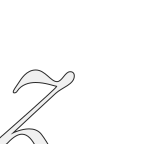

In [64]:
page = document(144, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(z_path_orig.scale(144/f.density).translate(0, 144)))
show(page)

We can mess around with the path by *modifying the path commands*. For example, the following code loops over each of the commands in the path and adds random noise to the `x` and `y` coordinates:

In [65]:
z_path = glyphcommands(f, "z")
for cmd in z_path.commands:
    if hasattr(cmd, 'x') and hasattr(cmd, 'y'):
        cmd.x += normal(0, 24)
        cmd.y += normal(0, 24)

(The [`hasattr` function](https://docs.python.org/3/library/functions.html#hasattr) checks to see if the object has the given attribute. This is necessary because the `closepath` command does not have an `x` or `y` attribute, so attempting to modify them would raise an `AttributeError`.)

The cell below draws the modified character and the original:

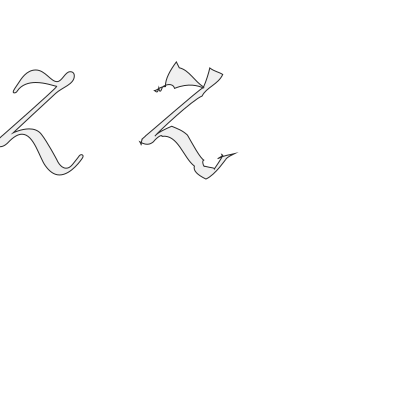

In [66]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(z_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(z_path.scale(144/f.density).translate(144, 144)))
show(page)

Using this technique, we can make programmatic changes to any path by modifying the `x` and `y` coordinates of the path command. It's a bit more complicated than this, since a command might be a `lineto`, a `quadto`, or a `curveto`, each of which has different attributes that need to be modified. The following cell defines a function `nudge()` that shifts all of a command's coordinates regardless of the command's type:

In [67]:
def nudge(cmd, x, y):
    c = copy(cmd)
    if type(cmd) in (moveto, lineto, quadto, curveto):
        c.x += x
        c.y += y
    if type(cmd) in (quadto, curveto):
        c.x1 += x
        c.y1 += y
    if type(cmd) == curveto:
        c.x2 += x
        c.y2 += y
    return c

This function returns a *copy* of the command with the modification applied, so we'll use it to build a new `Path` object with the resulting commands.

Now we can modify paths even for characters that have curves, like `b`:

In [68]:
b_path_orig = glyphcommands(f, "b")

In [69]:
b_path_mod = Path([nudge(cmd, x=normal(0, 15), y=normal(0, 15)) for cmd in b_path_orig])

This code constructs a new `Path` object resulting from adding normally-distributed random numbers to the `x` and `y` coordinates of each command (including curve control points). Here's what the result looks like:

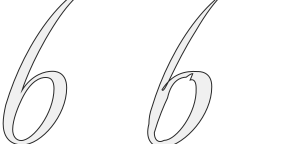

In [70]:
page = document(288, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(b_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(b_path_mod.scale(144/f.density).translate(144, 144)))
show(page)

Using a `for` loop makes it easy to stretch characters out, by nudging their `x` coordinate by a multiple of the `x` coordinate:

In [71]:
a_path_orig = glyphcommands(f, "a")
a_path_cmds = []
for cmd in a_path_orig:
    if hasattr(cmd, 'x'):
        a_path_cmds.append(nudge(cmd, x=cmd.x*0.2, y=0))
    else:
        a_path_cmds.append(cmd)
a_path_mod = Path(a_path_cmds)

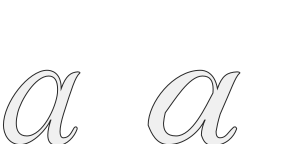

In [72]:
page = document(288, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(a_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(a_path_mod.scale(144/f.density).translate(144, 144)))
show(page)

Or we can selectively stretch out characters by only modifying points that meet certain criteria. The code in the cell below shifts up all commands whose `y` coordinate lies above 1/3 of the way from the baseline to the ascender height of the font:

In [73]:
a_path_orig = glyphcommands(f, "g")
a_path_cmds = []
mid_y = f.ascender * -0.33
for cmd in a_path_orig:
    if hasattr(cmd, 'y') and cmd.y < mid_y:
        a_path_cmds.append(nudge(cmd, x=0, y=-200))
    else:
        a_path_cmds.append(cmd)
a_path_mod = Path(a_path_cmds)

Here's what it looks like:

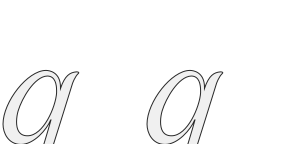

In [74]:
page = document(288, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(a_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(a_path_mod.scale(144/f.density).translate(144, 144)))
show(page)

#### Rendering a modified string

The easiest way to render an entire string with modified glyph paths is to put the path modification code into a function, like so:

In [296]:
def stretch_char(f, ch, height=-0.33):
    path_orig = glyphcommands(f, ch)
    path_cmds = []
    mid_y = f.ascender * height
    for cmd in path_orig:
        if hasattr(cmd, 'y') and cmd.y < mid_y:
            path_cmds.append(nudge(cmd, x=0, y=-200))
        else:
            path_cmds.append(cmd)
    path_mod = Path(path_cmds)
    return path_mod

This function has a parameter that lets you set the cutoff for deciding whether a command in the path will be offset or not, based on its distance from the baseline.

To draw the whole string, use the code from the simple string layout function above, calling the function to generate the glyph for each character in the string, advancing by the `advance`:

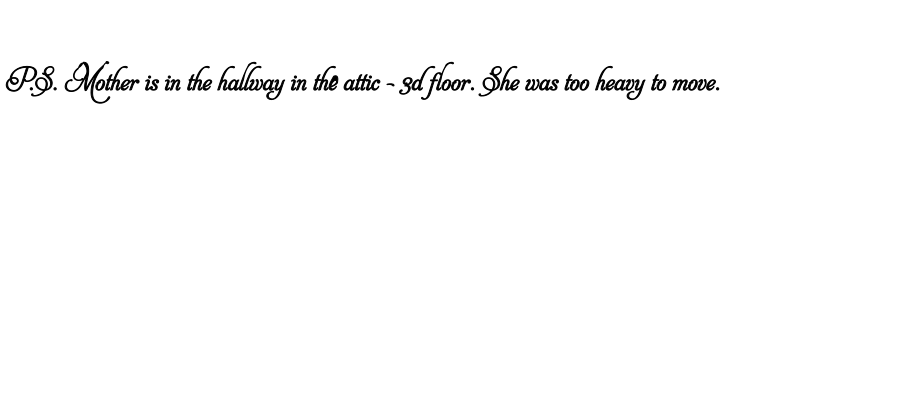

In [295]:
page = document(900, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
cx = 5
for ch in s:
    glyph_path = stretch_char(f, ch, uniform(-5, -0.25)).scale(factor).translate(cx, 90)
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

#### Modifying a larger path

For some effects, it's beneficial to apply coordinate transformations across the entire path of the string, instead of character-by-character. For this, use the `combine_path()` function introduced above, which returns one big path with all of the paths for the glyphs corresponding to the characters in the string. In the example below, I modify the `y` coordinate of each command in the path by the sine of the `x` coordinate, giving the resulting path a pleasing wave...

In [195]:
qf_path_orig = combine_path(f, "Dear Mom")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod = Path(qf_path_cmds)

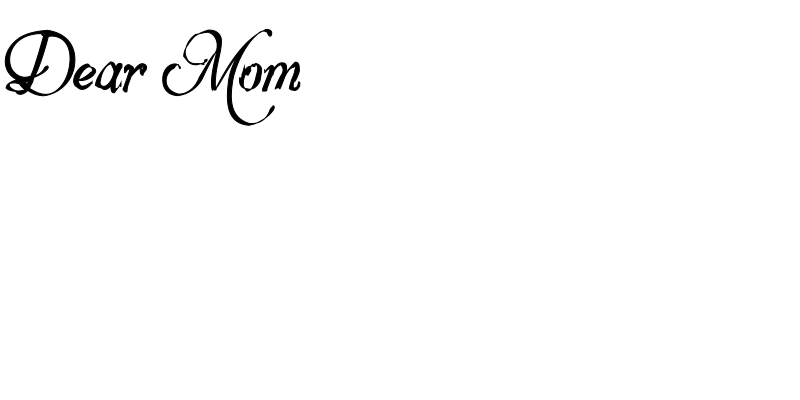

In [196]:
page = document(800, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 50 / f.density
page.place(pen.path(qf_path_mod.scale(factor).translate(0, 90)))
show(page)

Yes, we have reinvented [WordArt](https://en.wikipedia.org/wiki/Microsoft_Office_shared_tools#WordArt).

#### Re-interpreting font commands

One final example. Instead of using the original command in a path, we can "reinterpret" that command as something else. The example below draws lines instead of curves, and circles instead of lines, for each command in a path:

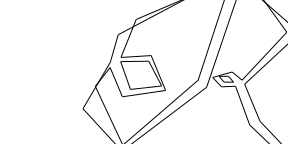

In [79]:
from math import sqrt
d = document(288, 144, 'pt')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).nofill()
factor = 144 / f.density
cx = 0
cy = 0
glyph_path = glyphcommands(f, "R").scale(factor).translate(72, 144)
for cmd in glyph_path:
    if type(cmd) == lineto:
        radius = sqrt(pow(cx - cmd.x, 2) + pow(cy - cmd.y, 2)) * 0.5
        page.place(pen.circle((cx + cmd.x) / 2, (cy + cmd.y) / 2, radius))
    elif type(cmd) in (curveto, quadto):
        page.place(pen.line(cx, cy, cmd.x, cmd.y))
    if type(cmd) != type(closepath):
        cx = cmd.x
        cy = cmd.y
show(page)

Drawing all commands as circles:

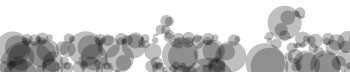

In [270]:
from math import sqrt
d = document(350, 72, 'pt')
page = d.addpage()
pen = shape().nostroke().fill(rgba(0, 0, 0, 64))
factor = 72 / f.density
cx = 0
cy = 0
glyph_path = combine_path(f, "quartzy foxes").scale(factor).translate(0, 72)
for cmd in glyph_path:
    if type(cmd) in (lineto, curveto, quadto):
        radius = sqrt(pow(cx - cmd.x, 2) + pow(cy - cmd.y, 2)) * 0.5
        page.place(pen.circle((cx + cmd.x) / 2, (cy + cmd.y) / 2, radius))
    if type(cmd) != type(closepath):
        cx = cmd.x
        cy = cmd.y
show(page)

### Manipulating sampled paths

Another way to manipulate vector drawings with curves is to resample them, e.g., turn the entire path into polylines. Bezmerizing has a class called `PolylineList` to facilitate this. A `PolylineList` is like a `Path`, except that each element of the path is a `Polyline` object.

In [81]:
from bezmerizing import PolylineList

To turn a `Path` into a `PolylineList`, use the `Path` object's `.to_polyline_list()` method:

In [272]:
qf_path_orig = combine_path(f, "DEAR MOM")
qf_plist = qf_path_orig.to_polyline_list(samples_per=50, resample_polylines=True)

One way to make use of the `PolylineList` is to iterate over it, and place each `Polyline` independently:

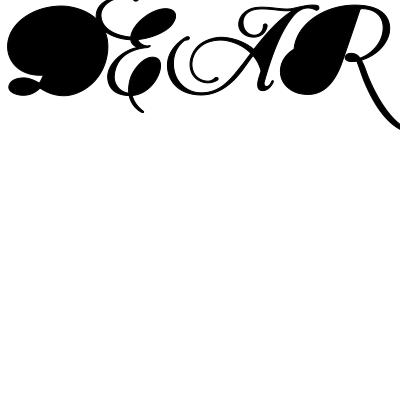

In [276]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
for poly in qf_plist:
    page.place(pen.polygon(poly.scale(factor).translate(0, 90)))
show(page)

This leads to an unusual result, however, which is that the counters of the letterforms aren't cut out! The counters are themselves polylines, and it turns out that counters and cut-outs only work if they're placed in the context of a `Path`, as noted above. (This results from the underlying properties of the SVG renderer. [Here's a good explanation.](https://oreillymedia.github.io/Using_SVG/extras/ch06-fill-rule.html))

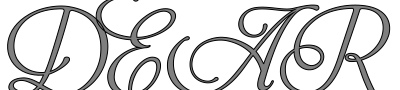

In [221]:
page = document(400, 90, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 72 / f.density
page.place(pen.path(qf_plist.to_path().scale(factor).translate(0, 90)))
show(page)

One way to modify a path like this is to iterate over each polyline in the `PolylineList`, then iterate over each vertex in the shape, applying some transformation to it. In the example below, we use `sin` and `cos` to modify each vertex, creating a new `Polyline` with the updated vertices, and a new `PolylineList` from the updated `Polyline`s:

In [277]:
mod = []
for pline in qf_plist:
    verts = []
    for item in pline.vertices:
        verts.append([item[0] + np.sin(item[1] * 0.01)*20,
                      item[1] + np.cos(item[0] * 2) *20])
    new_pline = Polyline(verts)
    mod.append(new_pline)
mod_plist = PolylineList(mod)

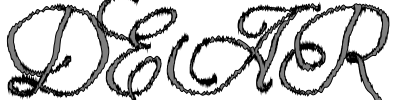

In [279]:
page = document(400, 100, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)

Another example: doing the same "glyph stretching" that we did above:

In [280]:
mid_y = f.ascender * -0.5
mod = []
for pline in qf_plist:
    verts = []
    # iterate through each vertex
    for item in pline.vertices:
        # get x and y coordinate
        new_x, new_y = item[0], item[1]
        # modify y coordinate if less than a certain threshold
        if item[1] < mid_y:
            verts.append([new_x, new_y -500])
        else:
            verts.append([new_x, new_y])
    # create a new polyline and append to list
    new_pline = Polyline(verts)
    mod.append(new_pline)
# create a modified polylinelist
mod_plist = PolylineList(mod)

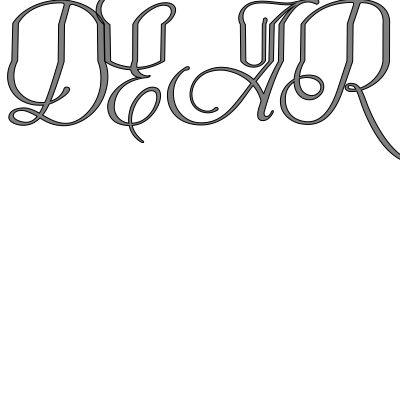

In [281]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 120)))
show(page)

*Advanced*: Another way to accomplish this is with the `PolylineList`'s `.map()` method, which applies the same function to each `Polyline` in the list:

In [257]:
mod_plist = qf_plist.map(lambda p: Polyline(p.vertices + 
                         np.stack([np.sin(p.vertices[:,1]*0.20)*10,
                                   np.cos(p.vertices[:,0]*-8)*20], axis=1)))

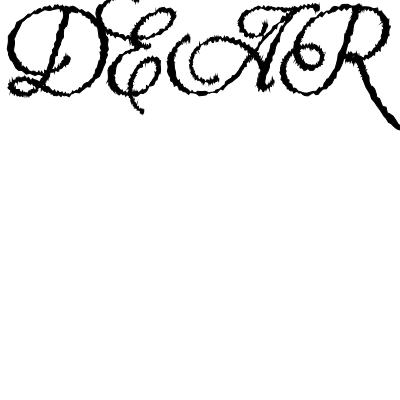

In [258]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)

## Further resources

For a general introduction to digital typography, I highly recommend [Simon Cozen's *Fonts and Layout for Global Scripts*](https://simoncozens.github.io/fonts-and-layout/). The [history chapter](https://simoncozens.github.io/fonts-and-layout//history.html) is especially insightful and well-researched.

More on digital representations of typefaces:

* [UFO](http://unifiedfontobject.org/versions/ufo3/), a contemporary file format for fonts
* [FreeType Glyph
  Conventions](https://www.freetype.org/freetype2/docs/glyphs/index.html) is documentation for FreeType (a widely-used glyph rendering library), but also a good introduction to digital typography in general
* [An Introduction to TrueType Fonts: A look inside the TTF format](https://scripts.sil.org/cms/scripts/page.php?site_id=nrsi&id=IWS-Chapter08)
* [Bézier Curves and Type Design: A Tutorial](https://learn.scannerlicker.net/2014/04/16/bezier-curves-and-type-design-a-tutorial/)
* [Typography in 8 bits: System fonts](https://damieng.com/blog/2011/02/20/typography-in-8-bits-system-fonts)

Artworks engaging font data:

* [Leslie Mezei, Babel Shook](https://www.atariarchives.org/artist/sec7.php)
* [Eduardo Kac, Accident, 1994](http://www.ekac.org/accident.html)
* [Jürg Lehni & Alex Rich, Empty words, 2008](http://juerglehni.com/works/empty-words)
* [Zach Lieberman et al, IQ Font](http://thesystemis.com/projects/iq-font/)
* [BalletFont](https://web.archive.org/web/20160812072806/http://www.creativeapplications.net/openframeworks/balletfont-openframeworks/) ([making-of video](https://youtu.be/-DdAp26lmIU))

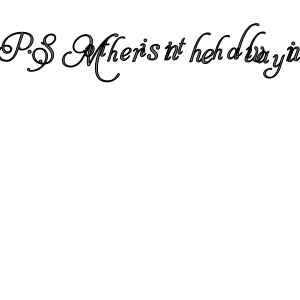

In [264]:
page = document(300, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 20 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(1, 1.5))
                  .translate(cx + normal(0, 4), 60 + normal(0, 4)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

In [129]:
h = "many   fancy word \nhello    \thi".split()

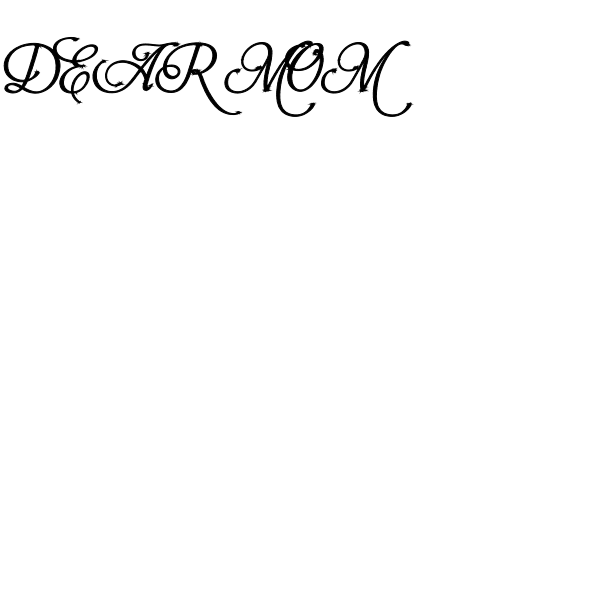

In [516]:
page = document(600, 600, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density*2
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)

In [289]:
mod = []
for pline in qf_plist:
    verts = []
    for item in pline.vertices:
        verts.append([item[0] + np.sin(item[1] * 0.01)*20,
                      item[1] + np.cos(item[0] * 25) *100])
    new_pline = Polyline(verts)
    mod.append(new_pline)
mod_plist = PolylineList(mod)

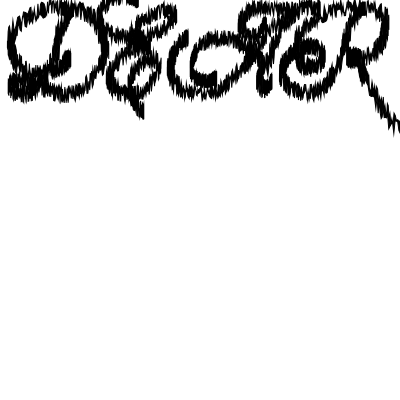

In [290]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)

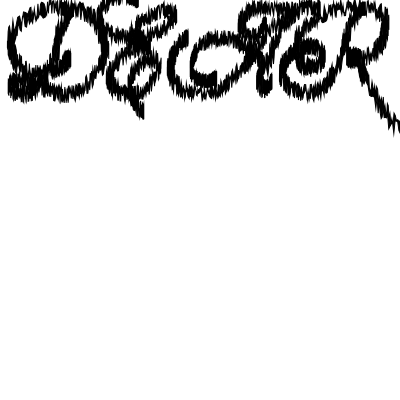

In [291]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)

In [314]:
def stretch_char(f, ch, height=-0.33):
    path_orig = glyphcommands(f, ch)
    path_cmds = []
    mid_y = f.ascender * height
    for cmd in path_orig:
        if hasattr(cmd, 'x') and cmd.y < mid_y:
            path_cmds.append(nudge(cmd, x=600, y=20))
        else:
            path_cmds.append(cmd)
    path_mod = Path(path_cmds)
    return path_mod

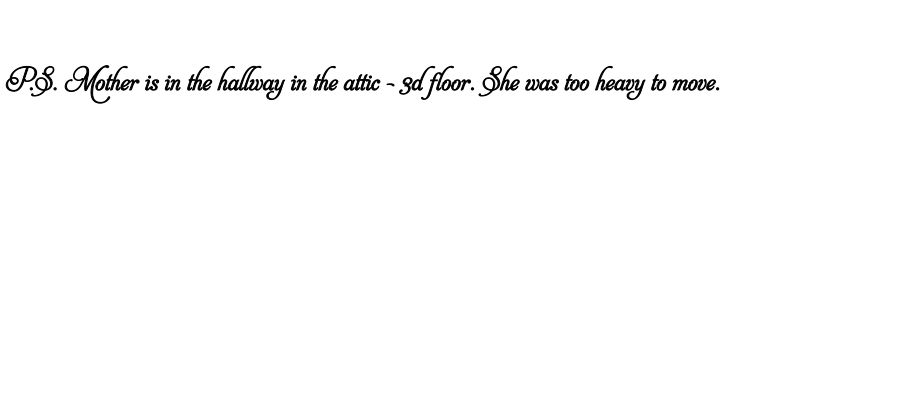

In [315]:
page = document(900, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
cx = 5
for ch in s:
    glyph_path = stretch_char(f, ch, uniform(-5, -0.25)).scale(factor).translate(cx, 90)
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

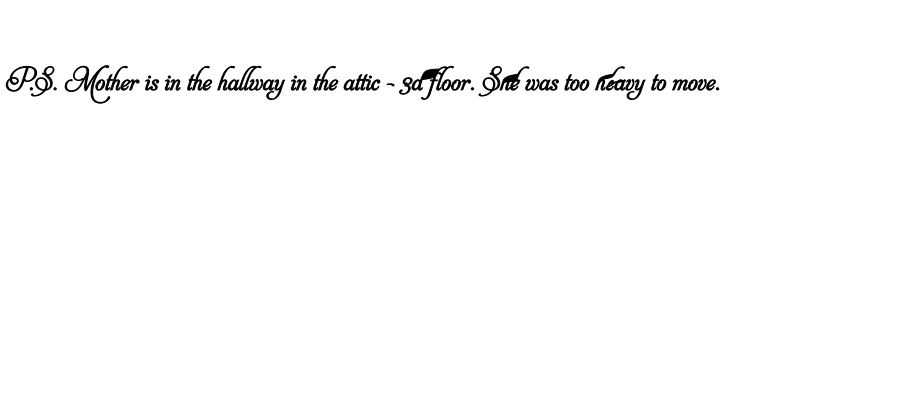

In [316]:
page = document(900, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
cx = 5
for ch in s:
    glyph_path = stretch_char(f, ch, uniform(-5, -0.25)).scale(factor).translate(cx, 90)
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

In [337]:
qf_path_orig = combine_path(f,"All have")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"gone to heaven now")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

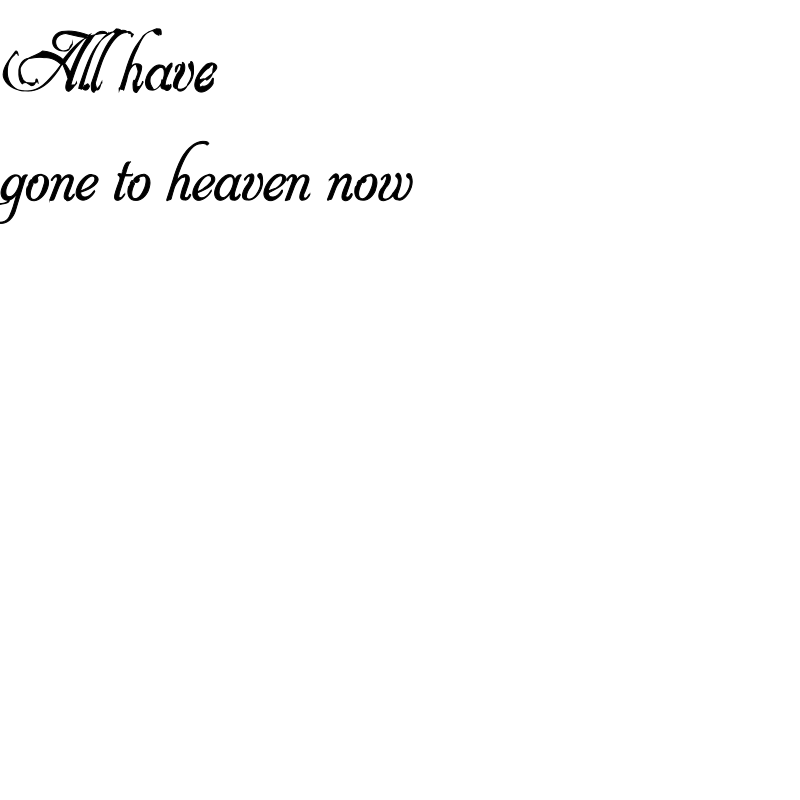

In [338]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 50 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(0, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(0, 200)))
show(page)

In [371]:
qf_path_orig = combine_path(f,"All have")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*100)*100))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"gone to")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*60)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"heaven now.")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

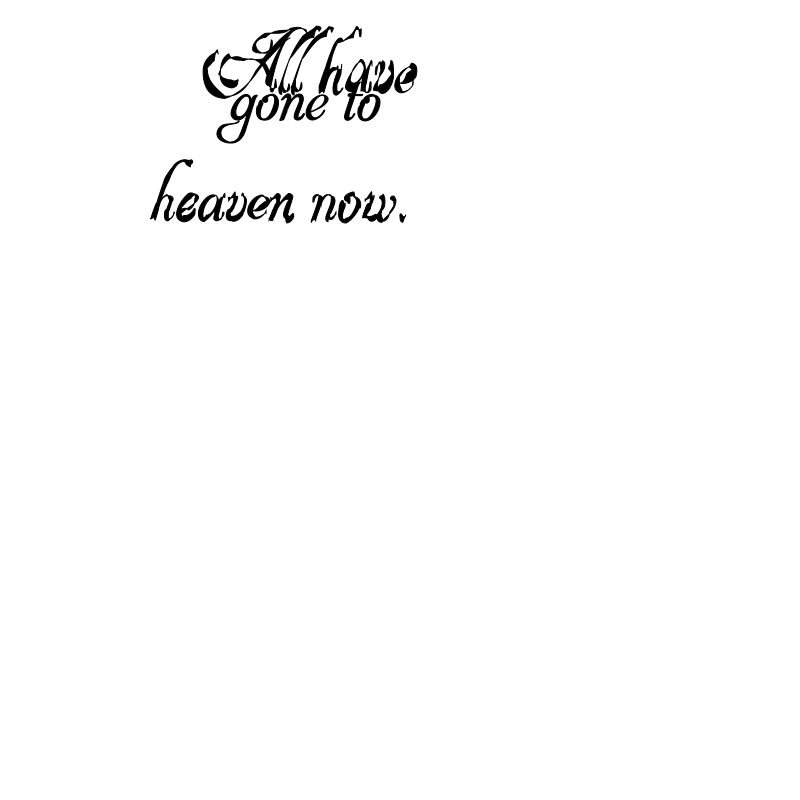

In [372]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 50 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(200, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(230, 120)))
page.place(pen.path(qf_path_mod[2].scale(factor).translate(150, 220)))
show(page)

In [362]:
a_path_orig = glyphcommands(f, "a")
a_path_cmds = []
for cmd in a_path_orig:
    if hasattr(cmd, 'x'):
        a_path_cmds.append(nudge(cmd, x=cmd.x*-0.5, y=0.5))
    else:
        a_path_cmds.append(cmd)
a_path_mod = Path(a_path_cmds)

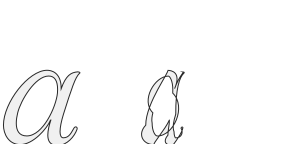

In [363]:
page = document(288, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(a_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(a_path_mod.scale(144/f.density).translate(144, 144)))
show(page)

In [370]:
a_path_orig = glyphcommands(f, "a")
a_path_cmds = []
for cmd in a_path_orig:
    if hasattr(cmd, 'x'):
        a_path_cmds.append(nudge(cmd, x=cmd.x*-0.5, y=0.5))
    else:
        a_path_cmds.append(cmd)
a_path_mod = Path(a_path_cmds)

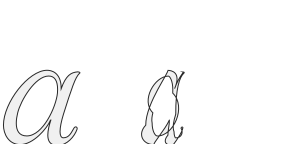

In [365]:
page = document(288, 144, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240))
page.place(pen.path(a_path_orig.scale(144/f.density).translate(0, 144)))
page.place(pen.path(a_path_mod.scale(144/f.density).translate(144, 144)))
show(page)

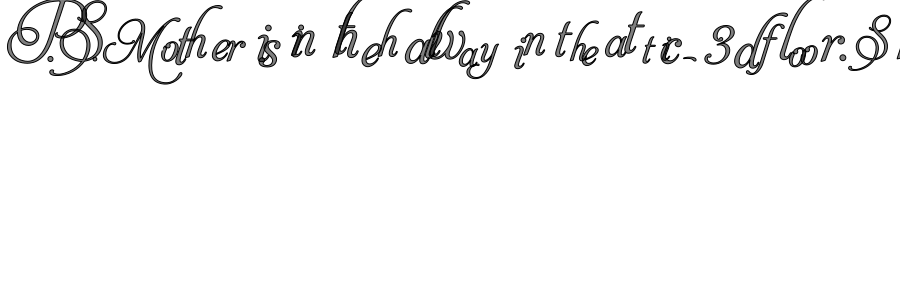

In [383]:
page = document(900, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.90, 1.5))
                  .translate(cx + normal(0, 4), 60 + normal(0, 4)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

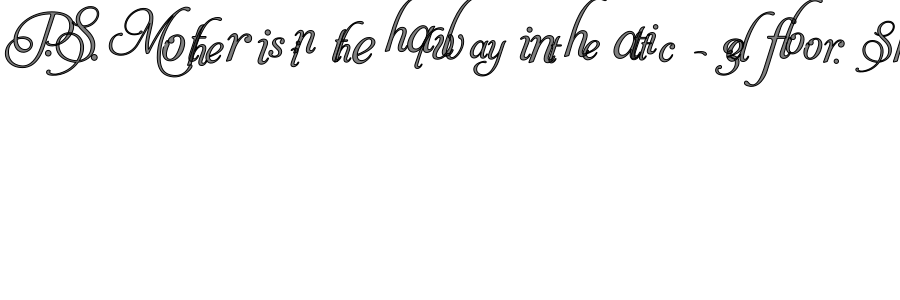

In [384]:
page = document(900, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.90, 1.5))
                  .translate(cx + normal(0, 4), 60 + normal(0, 4)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

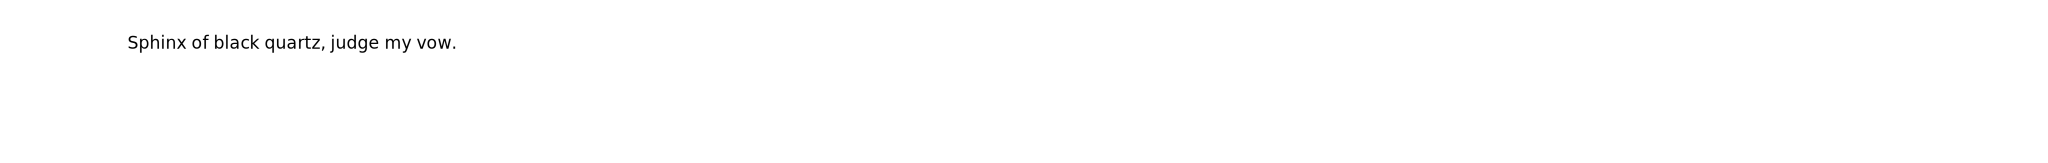

In [401]:
d = document(1000, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
text_pen = strike(f).color(rgba(0, 0, 0, 255)).size(24, 32)
page.place(text_pen.text("Sphinx of black quartz, judge my vow.")).frame(60, 10, 1000, 1000)
show(page)

In [456]:
w = "P.S. Mother is in the hallway in the attic"

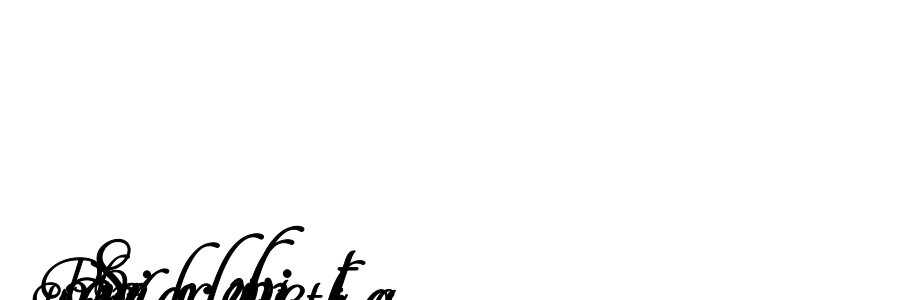

In [482]:
page = document(900, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 36 / f.density
cx = 0
for ch in w:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(1, 2))
                  .translate(cx + normal(0, 40), 300 + normal(15, 5)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor *0.5
show(page)

In [402]:
from flat import document

d = document()
d.pdf('document.pdf')

b'%PDF-1.3\n1 0 obj\n<< /Type /Catalog /Pages 3 0 R >>\nendobj\n2 0 obj\n<< /Title (Untitled) /Producer (Flat) >>\nendobj\n3 0 obj\n<< /Type /Pages /Kids [] /Count 0 >>\nendobj\nxref\n0 4\n0000000000 65535 f \n0000000009 00000 n \n0000000058 00000 n \n0000000114 00000 n \ntrailer << /ID [<0504d31b816844cdfc7d878cf19f3cb8> <0504d31b816844cdfc7d878cf19f3cb8>] /Root 1 0 R /Info 2 0 R /Size 4 >>\nstartxref\n166\n%%EOF'

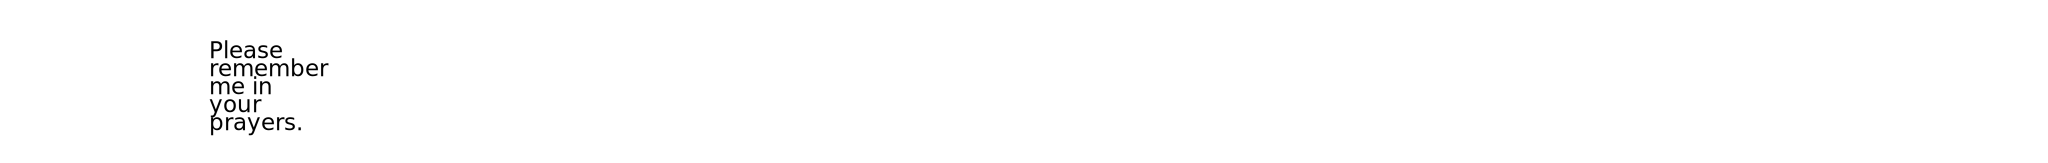

In [437]:
d = document(1000, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(3)
text_pen = strike(f).color(rgba(0, 0, 0, 255)).size(32, 25)
page.place(text_pen.text("Please\nremember me in your prayers.")).frame(100, 10, 50, 100)
show(page)

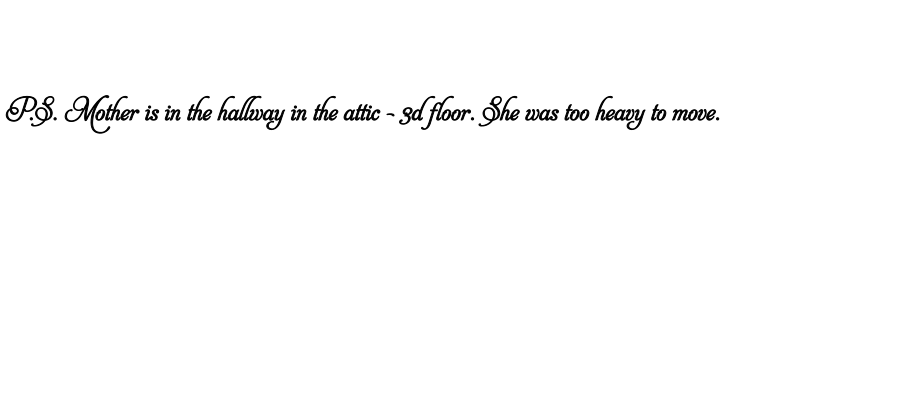

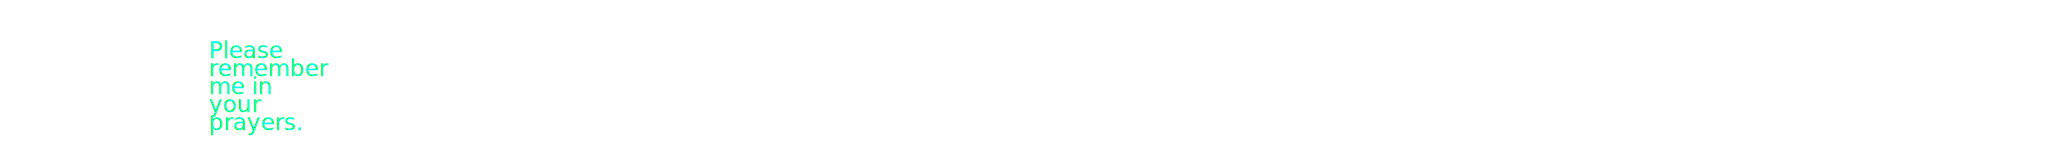

In [442]:
d = document(1000, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(3)
text_pen = strike(f).color(rgba(0, 255, 255, 255)).size(32, 25)
page.place(text_pen.text("Please\nremember\nme in your prayers.")).frame(100, 10, 50, 100)
show(page)

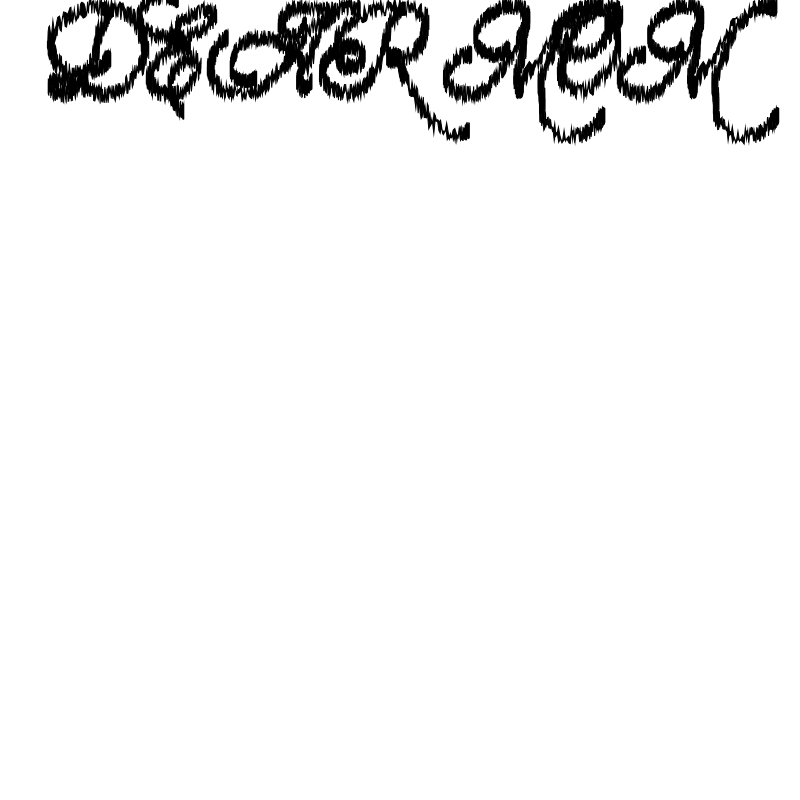

In [445]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(40, 90)))
show(page)

In [446]:
mod = []
for pline in qf_plist:
    verts = []
    for item in pline.vertices:
        verts.append([item[0] + np.sin(item[1] * 0.01)*20,
                      item[1] + np.cos(item[0] * 25) *100])
    new_pline = Polyline(verts)
    mod.append(new_pline)
mod_plist = PolylineList(mod)

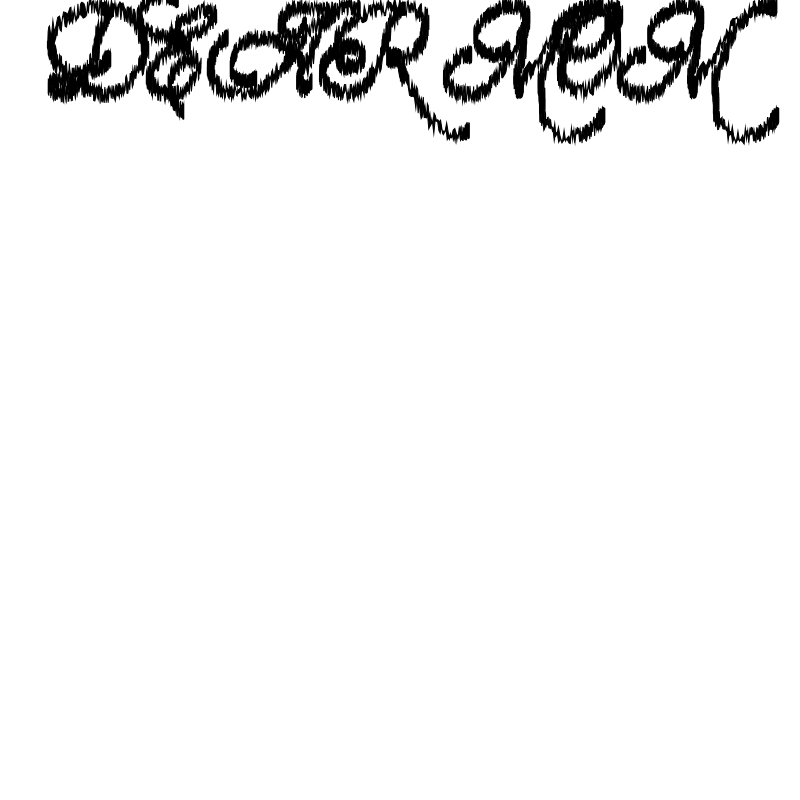

In [447]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 72 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(40, 90)))
show(page)

In [483]:
mod_plist = qf_plist.map(lambda p: Polyline(p.vertices + 
                         np.stack([np.sin(p.vertices[:,1]*0.20)*10,
                                   np.cos(p.vertices[:,0]*-8)*20], axis=1)))

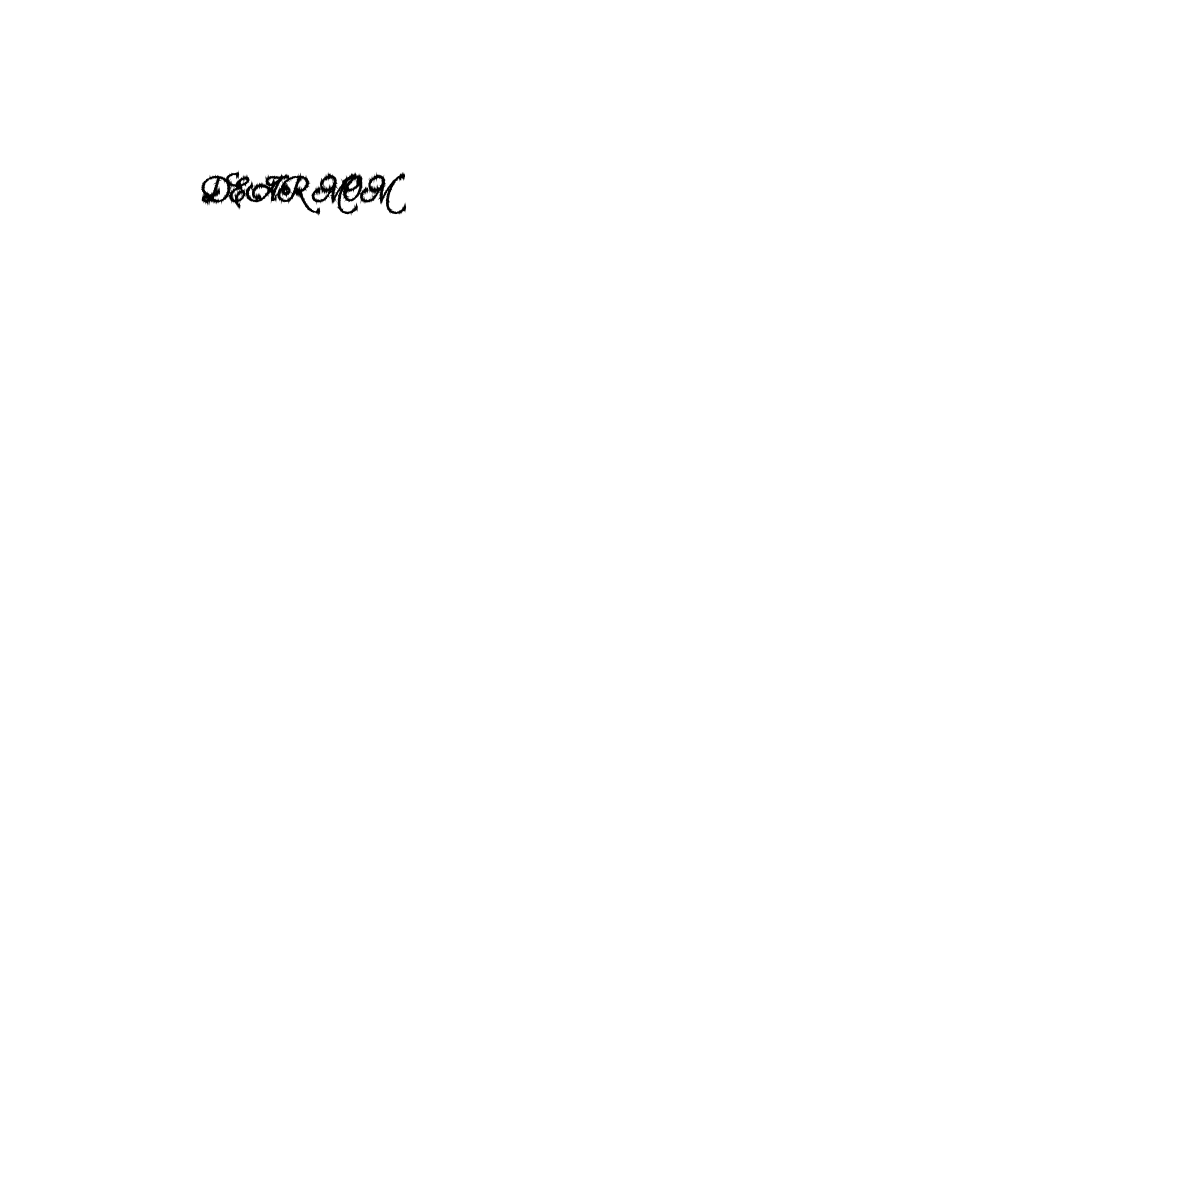

In [491]:
page = document(1200, 1200, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(200, 200)))
show(page)

In [509]:
mod_plist = qf_plist.map(lambda p: Polyline(p.vertices + 
                         np.stack([np.sin(p.vertices[:,0]*10)*2,
                                   np.cos(p.vertices[:,0]*10)*1], axis=1)))

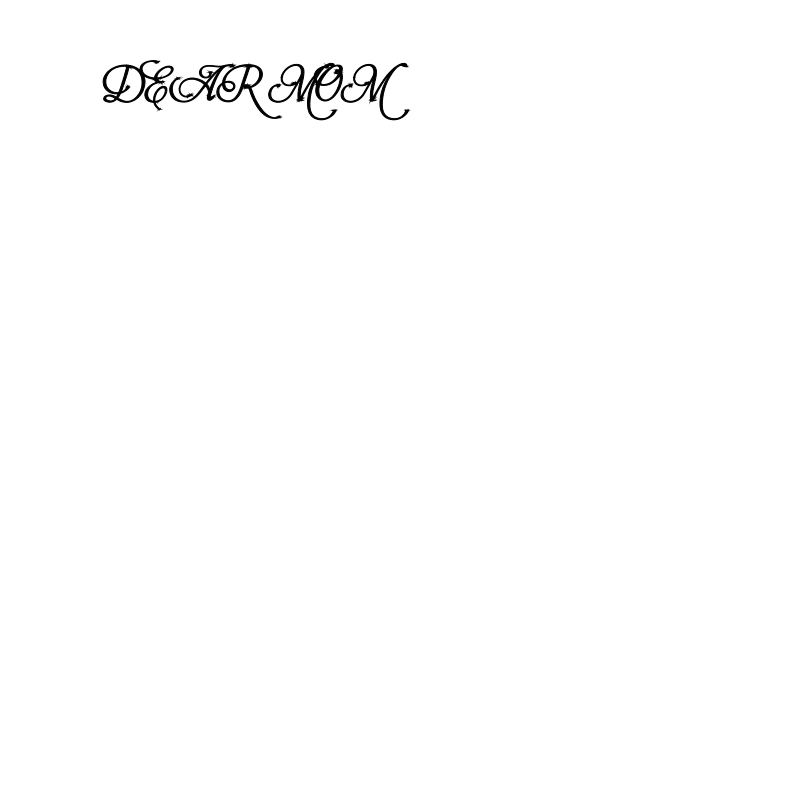

In [512]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 30 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(100, 100)))
show(page)

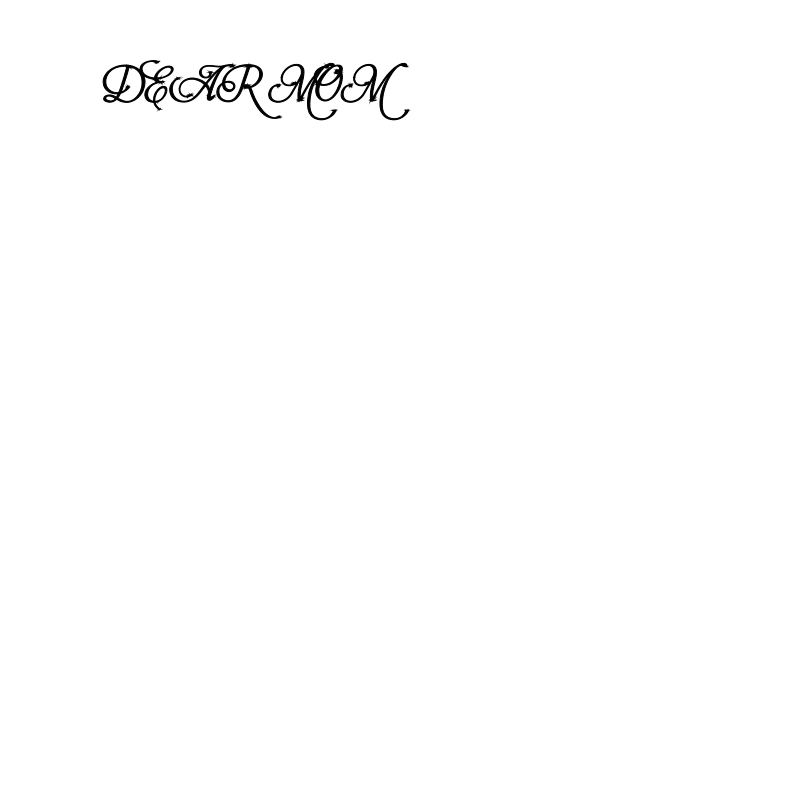

In [513]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 30 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(100, 100)))
show(page)

In [530]:
qf_path_orig = combine_path(f,"I am")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*100)*100))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"sorry")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*60)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to add this")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"additional")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

qf_path_orig = combine_path(f,"burden")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to your work.")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

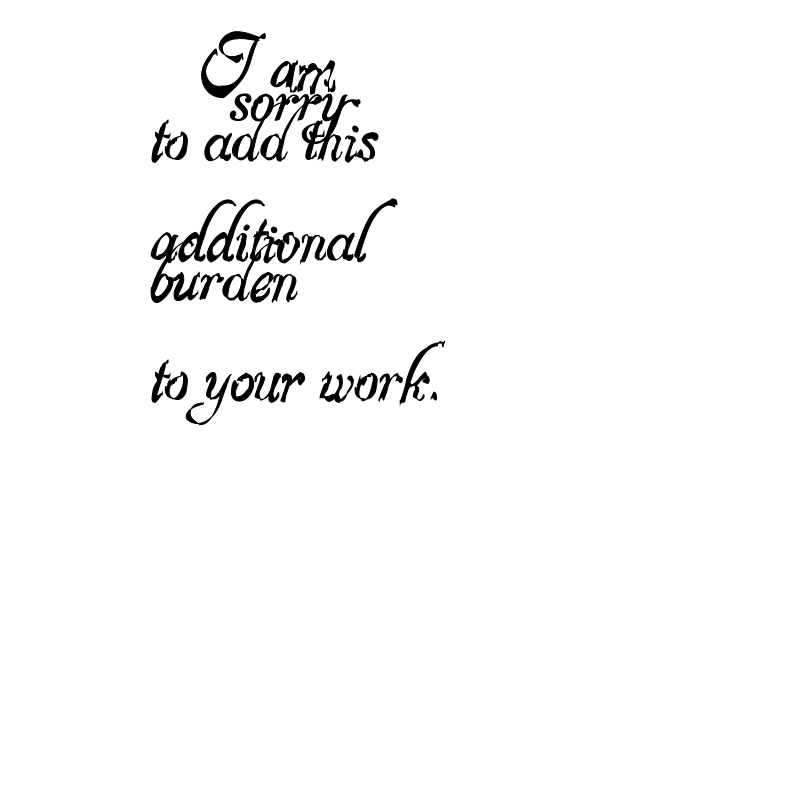

In [533]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 50 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(200, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(230, 120)))
page.place(pen.path(qf_path_mod[2].scale(factor).translate(150, 160)))
page.place(pen.path(qf_path_mod[3].scale(factor).translate(150, 260)))
page.place(pen.path(qf_path_mod[4].scale(factor).translate(150, 300)))
page.place(pen.path(qf_path_mod[5].scale(factor).translate(150, 400)))
show(page)

In [534]:
qf_path_orig = combine_path(f,"I am")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*100)*100))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"sorry")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*60)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to add this")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"additional")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

qf_path_orig = combine_path(f,"burden")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to your work.")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

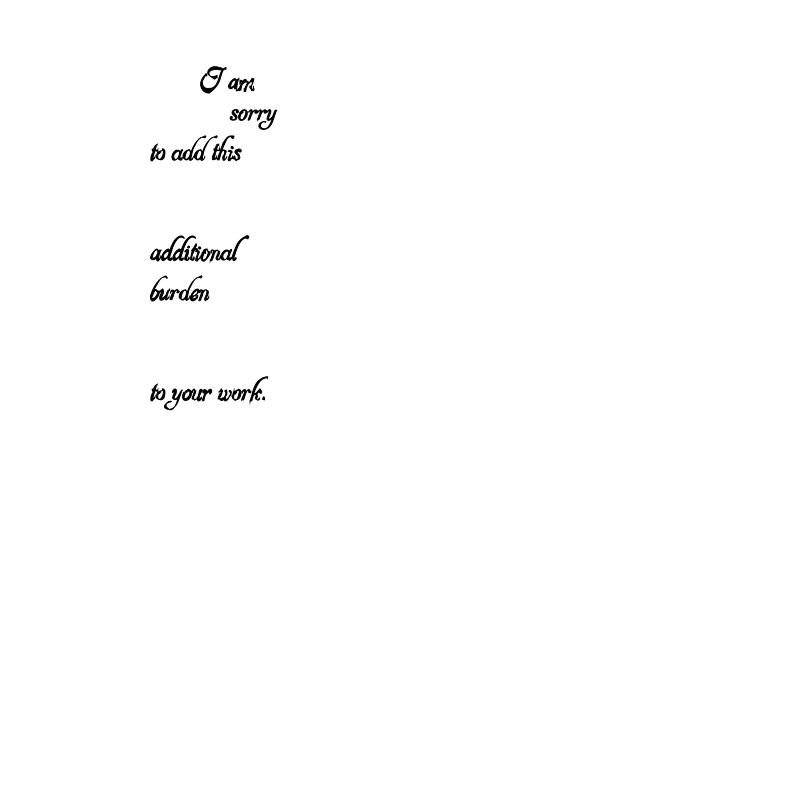

In [536]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(200, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(230, 120)))
page.place(pen.path(qf_path_mod[2].scale(factor).translate(150, 160)))
page.place(pen.path(qf_path_mod[3].scale(factor).translate(150, 260)))
page.place(pen.path(qf_path_mod[4].scale(factor).translate(150, 300)))
page.place(pen.path(qf_path_mod[5].scale(factor).translate(150, 400)))
show(page)

In [539]:
qf_path_orig = combine_path(f,"I am")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*10)*100))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"sorry")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*60)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to add this")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"additional")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

qf_path_orig = combine_path(f,"burden")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to your work.")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

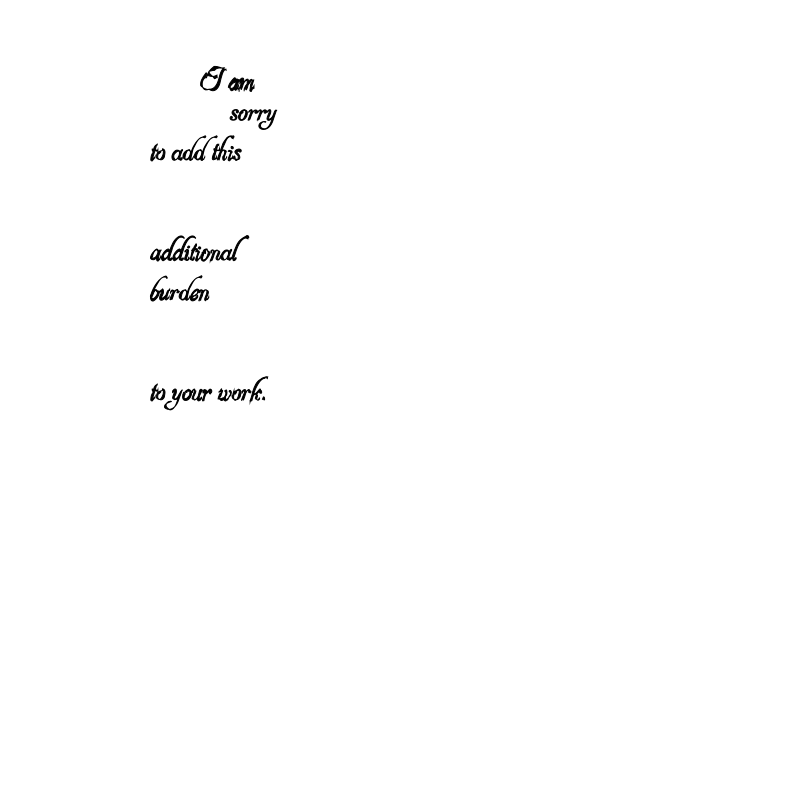

In [540]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(200, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(230, 120)))
page.place(pen.path(qf_path_mod[2].scale(factor).translate(150, 160)))
page.place(pen.path(qf_path_mod[3].scale(factor).translate(150, 260)))
page.place(pen.path(qf_path_mod[4].scale(factor).translate(150, 300)))
page.place(pen.path(qf_path_mod[5].scale(factor).translate(150, 400)))
show(page)

In [546]:
mod_plist = qf_plist.map(lambda p: Polyline(p.vertices + 
                         np.stack([np.sin(p.vertices[:,1]*200)*10,
                                   np.cos(p.vertices[:,0]*-350)/20], axis=1)))

In [549]:
qf_path_orig = combine_path(f,"I am")
qf_path_mod = []
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*-40)*100))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"sorry")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*60)*-10))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to add this")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"additional")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

qf_path_orig = combine_path(f,"burden")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))


qf_path_orig = combine_path(f,"to your work.")
qf_path_cmds = []
for cmd in qf_path_orig:
    if hasattr(cmd, 'x'):
        qf_path_cmds.append(nudge(cmd,
                                  x=0,
                                  y=np.cos(cmd.x*20)*-50))
    else:
        qf_path_cmds.append(cmd)
qf_path_mod.append(Path(qf_path_cmds))

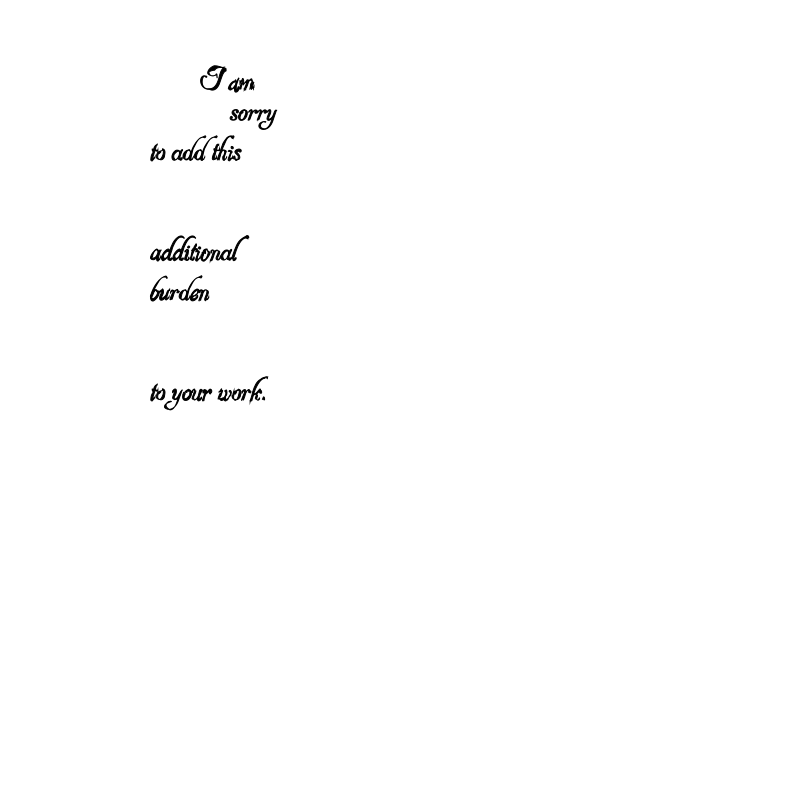

In [550]:
page = document(800, 800, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 20 / f.density
page.place(pen.path(qf_path_mod[0].scale(factor).translate(200, 90)))
page.place(pen.path(qf_path_mod[1].scale(factor).translate(230, 120)))
page.place(pen.path(qf_path_mod[2].scale(factor).translate(150, 160)))
page.place(pen.path(qf_path_mod[3].scale(factor).translate(150, 260)))
page.place(pen.path(qf_path_mod[4].scale(factor).translate(150, 300)))
page.place(pen.path(qf_path_mod[5].scale(factor).translate(150, 400)))
show(page)

In [561]:
def stretch_char(f, ch, height=-0.33):
    path_orig = glyphcommands(f, ch)
    path_cmds = []
    mid_y = f.ascender * height
    for cmd in path_orig:
        if hasattr(cmd, 'y') and cmd.y < mid_y:
            path_cmds.append(nudge(cmd, x=0, y=-200))
        else:
            path_cmds.append(cmd)
    path_mod = Path(path_cmds)
    return path_mod

In [563]:
page = document(800, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 50 / f.density
page.place(pen.path(qf_path_mod.scale(factor).translate(0, 90)))
show(page)

AttributeError: 'list' object has no attribute 'scale'

In [582]:
mom1 = "It's an appropriate day"

In [583]:
mom2 = "to go to heaven"

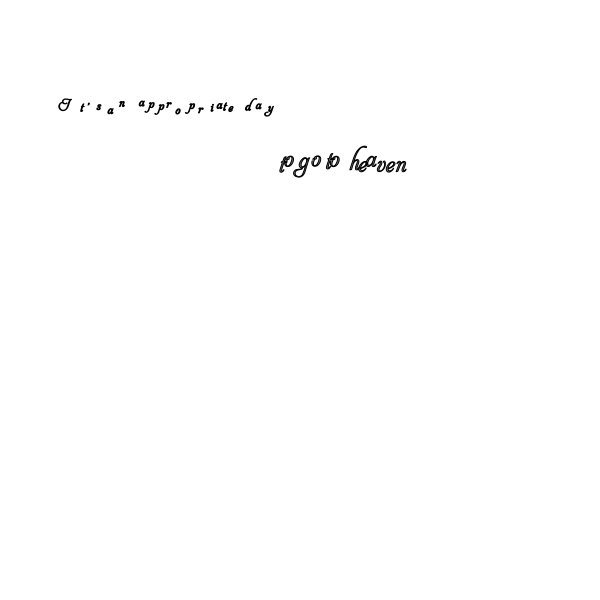

In [606]:
page = document(600, 600, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 20 / f.density
cx = 60
cy = 10
for ch in mom1:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.5, 0.5))
                  .translate(cx + normal(0, 2), 60 + normal(50, 2)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor

for ch in mom2:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(1, 1))
                  .translate(cx + normal(1, 2), 120 + normal(50, 2)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

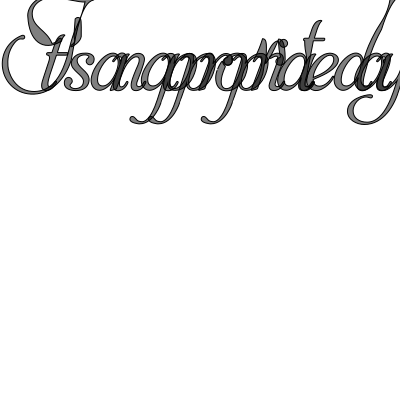

In [612]:
page = document(400, 400, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 72 / f.density
cx = 0
for ch in mom1:
    glyph_path = stretch_char(f, ch, uniform(-1, -0.25)).scale(factor).translate(cx*0.5, 90)
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

In [642]:
qf_path_orig = combine_path(f, "HAPPY")
qf_plist = qf_path_orig.to_polyline_list(samples_per=24, resample_polylines=True)

In [643]:
mid_y = f.ascender *0.5
mod = []
for pline in qf_plist:
    verts = []
    # iterate through each vertex
    for item in pline.vertices:
        # get x and y coordinate
        new_x, new_y = item[0], item[1]
        # modify y coordinate if less than a certain threshold
        if item[1] < mid_y:
            verts.append([new_x, new_y + 10])
        else:
            verts.append([new_x, new_y])
    # create a new polyline and append to list
    new_pline = Polyline(verts)
    mod.append(new_pline)
# create a modified polylinelist
mod_plist = PolylineList(mod)

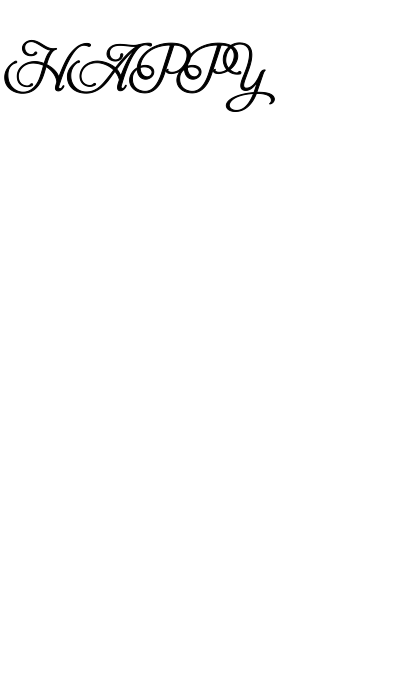

In [645]:
page = document(400, 700, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 255))
factor = 40 / f.density
cmds = []
page.place(pen.path(mod_plist.to_path().scale(factor).translate(0, 90)))
show(page)